# Evaluating Word Alignment

We show several methods/tools to evaluate word alignment models. The full code is found in [Github](https://github.com/ngohoanhkhoa/Generative_Probabilistic_Alignment_Models). All descriptions and other informations are shown in [Theses.fr](https://www.theses.fr/2021UPASG014).

## Codes

In [272]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors

In [273]:
def show_alignment(source, target, sure, fuzzy, prediction=None, figsize=(10,10), sizeMaker=250):
    source = source.split()
    target = target.split()

    sure = sure.split()
    fuzzy = fuzzy.split()

    source_len = len(source)
    target_len = len(target)

    alignment = np.zeros((source_len, target_len))
    labels = np.asarray([["" for _ in range(0, target_len)] for _ in range(0, source_len)])
 
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            if align_check in sure:
                alignment[idx_source-1, idx_target-1]=2
                labels[idx_source-1, idx_target-1] = "S"
            if align_check in fuzzy:
                alignment[idx_source-1, idx_target-1]=1
                labels[idx_source-1, idx_target-1] = "F"
                
    fig, ax = plt.subplots(figsize=figsize)

    ax = sns.heatmap(alignment, linewidth=0.3, annot=labels, fmt="", cbar=False, square=True,cmap="Blues")
    
    ax.set_yticklabels(source, rotation=0)
    ax.set_xticklabels(target, rotation=90)
    ax.set_title("Alignment matrix: Sure (S) and Fuzzy (F) links")

    if prediction != None:
        prediction = prediction.split()
        for idx_source in range(1, source_len+1):
            for idx_target in range(1, target_len+1):
                align_check = str(idx_source) +'-'+ str(idx_target)
                if align_check in prediction:
                    ax.scatter(idx_target-0.5, idx_source-0.5, s=sizeMaker, facecolors='none', edgecolors='red', linewidths=2.)
        ax.set_title("Alignment matrix: Sure (S) and Fuzzy (F) links. Red circle for Prediction links")

    
    fig.tight_layout()
    plt.show()

### Analysis for Reference 

In [29]:
def analyse_reference(sure, fuzzy, source, target):
    sure = sure.split()
    fuzzy = fuzzy.split()
    reference = sure + fuzzy

    source = source.split()
    target = target.split()

    #-------------------------------------
    total_num_link = 0
    total_null_link = 0
    
    num_word_source = 0
    num_word_target = 0
    
    # Count for Reference
    num_align_ref = 0
    num_no_ref = 0
    
    num_sure = 0
    num_fuzzy = 0
    
    num_align_ref_one2one = 0
    num_align_ref_one2many_source = 0
    num_align_ref_one2many_target = 0
    num_align_ref_many2one_source = 0
    num_align_ref_many2one_target = 0
    num_align_ref_many2many = 0
    num_align_ref_many2many_source = 0
    num_align_ref_many2many_target = 0
    
    num_no_ref_no = 0
    num_no_ref_null = 0


    # Null
    num_source2null_ref = 0
    num_target2null_ref = 0
    num_source2notnull_ref = 0
    num_target2notnull_ref = 0
    
    num_source2null_ref_ratio_list = []
    num_target2null_ref_ratio_list = []
    
    #-------------------------------------
    for s in sure:
        num_sure+= 1

    for p in fuzzy:
        num_fuzzy+= 1
    
    source_len = len(source)
    target_len = len(target)
    
    total_num_link += ((source_len) * (target_len))
    total_null_link += ((source_len) + (target_len))
    
    num_word_source += source_len
    num_word_target += target_len
    
    #-------------------------------------
    # Null
    num_source2null_ref_sent = 0
    num_target2null_ref_sent = 0
    
    for idx_source in range(1, source_len+1):
        source_to_null_ref = True
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            if align_check in reference:
                source_to_null_ref = False
                
        if source_to_null_ref:
            num_source2null_ref+=1
            num_source2null_ref_sent+=1
        else:
            num_source2notnull_ref+=1
                
        
    for idx_target in range(1, target_len+1):
        target_to_null_ref = True
        for idx_source in range(1, source_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            if align_check in reference:
                target_to_null_ref = False
                
        if target_to_null_ref:
            num_target2null_ref+=1
            num_target2null_ref_sent+=1
        else:
            num_target2notnull_ref+=1
            
    num_source2null_ref_ratio_list.append(num_source2null_ref_sent/source_len)
    num_target2null_ref_ratio_list.append(num_target2null_ref_sent/target_len)
    
    #-------------------------------------
    # One-to-one, one-to-many, many-to-one, many-to-many
    num_align_ref_one2many_source_list = []
    num_align_ref_many2one_target_list = []
    num_align_ref_many2many_source_list = []
    num_align_ref_many2many_target_list = []
    
    align_ref_one2one_list = []
    align_ref_one2many_list = []
    align_ref_many2one_list = []
    align_ref_many2many_list = []
    
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            
            # Count number of links in Reference
            if align_check in reference:
                num_align_ref +=1
                
                check_one2many = False
                check_many2one = False
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in reference and align_check_ != align_check:
                        check_one2many = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in reference and align_check_ != align_check:
                        check_many2one = True
                
                if check_one2many is True and check_many2one is False:
                    num_align_ref_one2many_target +=1
                    align_ref_one2many_list.append(align_check)
                    if idx_source not in num_align_ref_one2many_source_list:
                        num_align_ref_one2many_source_list.append(idx_source)
                if check_many2one is True and check_one2many is False:
                    num_align_ref_many2one_source +=1
                    align_ref_many2one_list.append(align_check)
                    if idx_target not in num_align_ref_many2one_target_list:
                        num_align_ref_many2one_target_list.append(idx_target)
                if check_one2many is False and check_many2one is False:
                    num_align_ref_one2one +=1
                    align_ref_one2one_list.append(align_check)
                    
            # Count number of links not in Reference
            if align_check not in reference:
                num_no_ref +=1
                
                source_to_null = True
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in reference:
                        source_to_null = False
                
                target_to_null = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in reference:
                        target_to_null = False
                        
                if source_to_null and target_to_null:
                    num_no_ref_null +=1
                    
                else:
                    num_no_ref_no +=1
            
                    
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            # Count number of many2many links in Ref
            if align_check in reference:
                
                check_one2many = False
                check_many2one = False
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in reference and align_check_ != align_check:
                        check_one2many = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in reference and align_check_ != align_check:
                        check_many2one = True
                        
                if check_one2many is True and check_many2one is True:
                    if idx_source not in num_align_ref_many2many_source_list \
                    and idx_source not in num_align_ref_one2many_source_list:
                        num_align_ref_many2many_source_list.append(idx_source)
                    if idx_target not in num_align_ref_many2many_target_list \
                    and idx_target not in num_align_ref_many2one_target_list:
                        num_align_ref_many2many_target_list.append(idx_target)
                    num_align_ref_many2many+=1
                    align_ref_many2many_list.append(align_check)
                    
                    
    num_align_ref_one2many_source += len(num_align_ref_one2many_source_list)
    num_align_ref_many2one_target += len(num_align_ref_many2one_target_list)
    
    num_align_ref_many2many_source += len(num_align_ref_many2many_source_list)
    num_align_ref_many2many_target += len(num_align_ref_many2many_target_list)
    
    num_source2null_ref_ratio_mean = np.mean(num_source2null_ref_ratio_list)
    num_target2null_ref_ratio_mean = np.mean(num_target2null_ref_ratio_list)
    
    #-------------------------------------
    values = {"num_word_source": num_word_source, 
              "num_word_target": num_word_target,
              "total_num_link": total_num_link,
              "num_sure": num_sure, 
              "num_fuzzy": num_fuzzy,
              
              "num_align_ref": num_align_ref, 
              "num_no_ref": num_no_ref, 
              "num_no_ref_no": num_no_ref_no, 
              "num_no_ref_null": num_no_ref_null,

              "num_align_ref_one2one": num_align_ref_one2one, 
              "num_align_ref_one2many_source": num_align_ref_one2many_source, 
              "num_align_ref_one2many_target": num_align_ref_one2many_target,
              "num_align_ref_many2one_source": num_align_ref_many2one_source, 
              "num_align_ref_many2one_target": num_align_ref_many2one_target,
              "num_align_ref_many2many": num_align_ref_many2many, 
              "num_align_ref_many2many_source": num_align_ref_many2many_source, 
              "num_align_ref_many2many_target": num_align_ref_many2many_target,

              "total_null_link": total_null_link, 
              "num_source2null_ref": num_source2null_ref, 
              "num_target2null_ref": num_target2null_ref, 
              "num_source2notnull_ref": num_source2notnull_ref, 
              "num_target2notnull_ref": num_target2notnull_ref,
              "num_source2null_ref_ratio_mean": num_source2null_ref_ratio_mean, 
              "num_target2null_ref_ratio_mean": num_target2null_ref_ratio_mean}
    
    return values

In [160]:
def show_graphs_reference(result, figScale=1.2, figsize=(20,5)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]

    palettes = list(mcolors.TABLEAU_COLORS.values())
    #-----------------------------------------------------------------
    x = ["Source I="+ str(result["num_word_source"]), "Target J="+ str(result["num_word_target"])]
    y = [result["num_word_source"], result["num_word_target"] ]
    y_aligned = [result["num_source2notnull_ref"], result["num_target2notnull_ref"] ]
    y_notAligned = [result["num_source2null_ref"], result["num_target2null_ref"] ]

    ax1.bar(x=x, height=np.array(y_aligned)+np.array(y_notAligned), color=palettes[0])
    ax1.bar(x=x, height=y_aligned, color=palettes[1])
    ax1.set(xlabel="Aligned/Unaligned words", ylabel='Number of words')
    ax1.set(ylim=(0, np.max(y)*figScale))
    for index, (v1, v2) in enumerate(zip(y_aligned,y_notAligned)):
        ax1.text(index, v1, str(v1), color='black', ha="center", verticalalignment="bottom")
        ax1.text(index, v1+v2, str(v2), color='black', ha="center", verticalalignment="bottom")

    ax1.legend(("Unaligned", "Aligned"),loc=4)
    #-----------------------------------------------------------------
    x = ["Sure links", "Fuzzy links", "Null links"]
    y = [result["num_sure"], result["num_fuzzy"],  result["num_no_ref_null"]]
    sns.barplot(x=x, y=y, ax=ax2, palette=palettes)

    ax2.set(ylim=(0, np.max(y)*figScale))
    ax2.set(xlabel="All possible links I*J: " + str(result["total_num_link"]) + \
                "\n Non-existing links: " + str(result["num_no_ref"]) + ", including Null links", ylabel='Number of links')
    for index, value in enumerate(y):
        ax2.text(index, value, str(value), color='black', ha="center", verticalalignment="bottom")

    #-----------------------------------------------------------------
    x = ["One2One", "One2Many", "Many2One", "Many2Many", "%"]
    y = [result["num_align_ref_one2one"], result["num_align_ref_one2many_target"], 
        result["num_align_ref_many2one_source"], result["num_align_ref_many2many"]]
    y_text = [str(result["num_align_ref_one2one"])+"-"+str(result["num_align_ref_one2one"]),
            str(result["num_align_ref_one2many_source"])+"-"+str(result["num_align_ref_one2many_target"]),
            str(result["num_align_ref_many2one_source"])+"-"+str(result["num_align_ref_many2one_target"]),
            str(result["num_align_ref_many2many_source"])+"-"+str(result["num_align_ref_many2many_target"])
            ]
    y_percent = np.array(y)*100/result["num_align_ref"]

    one2one_percent = (100 * result["num_align_ref_one2one"]/result["num_align_ref"])
    one2many_percent = one2one_percent + (100 * result["num_align_ref_one2many_target"]/result["num_align_ref"])
    many2one_percent = one2many_percent + (100 * result["num_align_ref_many2one_source"]/result["num_align_ref"])
    many2many_percent = many2one_percent + (100 * result["num_align_ref_many2many"]/result["num_align_ref"])

    ax3.set(ylim=(0, np.max(y)*figScale))
    ax3.set(xlabel="Alignment links: Source-Target", ylabel='Number of links')
    ax3.bar(x=x, height=[result["num_align_ref_one2one"], 0, 0, 0, 0], color=palettes[0])
    ax3.bar(x=x, height=[0, result["num_align_ref_one2many_target"], 0, 0, 0], color=palettes[1])
    ax3.bar(x=x, height=[0, 0, result["num_align_ref_many2one_source"], 0, 0], color=palettes[2])
    ax3.bar(x=x, height=[0, 0, 0, result["num_align_ref_many2many"], 0], color=palettes[3])

    for index, (height, value) in enumerate(zip(y,y_text)):
        ax3.text(index, height, value, color='black', ha="center", verticalalignment="bottom")

    ax3X = ax3.twinx()
    ax3X.set(ylabel='Percentage')
    ax3X.set(ylim=(0, 110))
    ax3X.bar(x=x, height=[0, 0, 0, 0, many2many_percent], color=palettes[3])
    ax3X.bar(x=x, height=[0, 0, 0, 0, many2one_percent], color=palettes[2])
    ax3X.bar(x=x, height=[0, 0, 0, 0, one2many_percent], color=palettes[1])
    ax3X.bar(x=x, height=[0, 0, 0, 0, one2one_percent], color=palettes[0])

    y_bar = [one2one_percent, one2many_percent, many2one_percent, many2many_percent]

    for index, value in zip(y_bar, y_percent):
        if value != 0:
            ax3X.text(4, index, str(np.round(value, 1)) +"%", color='black', ha="center", verticalalignment="bottom")

    ax3X.legend(("Many2Many", "Many2One", "One2Many", "One2One"),loc=4)
    #-----------------------------------------------------------------

    fig.tight_layout(pad=3.)

### Analysis for Prediction

In [165]:
def calculate_scores(tp, fp, tn, fn):
    acc = 0.
    if tp + fp + tn + fn != 0:
        acc = (tp+tn)/(tp + fp + tn + fn)
        
    precision = 0.
    if tp+fp != 0.:
        precision = tp/(tp+fp)
        
    recall = 0.
    if tp+fn != 0.:
        recall = tp/(tp+fn)
        
    f1 = 0.
    if precision+recall != 0:
        f1 = (2*precision*recall)/(precision+recall)
    
    return acc, precision, recall, f1

In [166]:
def analyse_prediction(prediction, sure, fuzzy, source, target):
    sure = sure.split()
    fuzzy = fuzzy.split()
    ref = sure + fuzzy
    pred = prediction.split()
    source = source.split()
    target = target.split()

    #-------------------------------------
    # Count for Prediction
    num_align_pred = 0
    num_no_pred = 0
    num_align_pred_one2one = 0
    num_align_pred_one2many_source = 0
    num_align_pred_one2many_target = 0
    num_align_pred_many2one_source = 0
    num_align_pred_many2one_target = 0
    num_align_pred_many2many = 0
    num_align_pred_many2many_source = 0
    num_align_pred_many2many_target = 0

    num_no_pred_no = 0
    num_no_pred_null = 0
    
    #TP
    num_true_align_tp = 0
    
    num_true_align_tp_one2one_pred = 0
    num_true_align_tp_one2many_pred = 0
    num_true_align_tp_many2one_pred = 0
    num_true_align_tp_many2many_pred = 0
    
    #TN
    num_true_no_tn = 0
    num_true_no_tn_no_in_pred = 0
    num_true_no_tn_null_in_pred = 0
    
    #FN
    num_false_no_fn = 0
    num_false_no_fn_no_in_pred = 0
    num_false_no_fn_null_in_pred = 0
    
    #FP
    num_false_align_no_fp = 0
    num_false_align_no_fp_one2one_pred = 0
    num_false_align_no_fp_one2many_pred = 0
    num_false_align_no_fp_many2one_pred = 0
    num_false_align_no_fp_many2many_pred = 0

    num_false_align_no_fp_no_in_ref = 0
    num_false_align_no_fp_null_in_ref = 0

    # Null
    num_source2null_pred = 0
    num_target2null_pred = 0
    num_source2notnull_pred = 0
    num_target2notnull_pred = 0
    
    num_source2null_pred_tp = 0
    num_source2null_pred_fp = 0
    num_source2null_pred_tn = 0
    num_source2null_pred_fn = 0
    
    num_target2null_pred_tp = 0
    num_target2null_pred_fp = 0
    num_target2null_pred_tn = 0
    num_target2null_pred_fn = 0
    
    num_source2null_pred_ratio_list = []
    num_target2null_pred_ratio_list = []
    
    num_true_null_tp = 0
    num_false_not_null_fp = 0
    num_false_null_fn = 0
    num_true_not_null_tn = 0
    
    
    source_len = len(source)
    target_len = len(target)

    #-------------------------------------
    # Null
    num_source2null_pred_sent = 0
    num_target2null_pred_sent = 0
    
    for idx_source in range(1, source_len+1):
        source_to_null_ref = True
        source_to_null_pred = True
        
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            if align_check in ref:
                source_to_null_ref = False
            if align_check in pred:
                source_to_null_pred = False
                
            
        if source_to_null_pred:
            num_source2null_pred+=1
            num_source2null_pred_sent+=1
            
        else:
            num_source2notnull_pred+=1
            
        if source_to_null_ref and source_to_null_pred:
            num_true_null_tp+=1
            num_source2null_pred_tp+=1
            
        if not source_to_null_ref and not source_to_null_pred:
            num_true_not_null_tn+=1  
            num_source2null_pred_tn+=1
            
        if source_to_null_ref and not source_to_null_pred:
            num_false_null_fn+=1
            num_source2null_pred_fn+=1
            
        if not source_to_null_ref and source_to_null_pred:
            num_false_not_null_fp+=1
            num_source2null_pred_fp+=1
            
        
    for idx_target in range(1, target_len+1):
        target_to_null_ref = True
        target_to_null_pred = True
        
        for idx_source in range(1, source_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            if align_check in ref:
                target_to_null_ref = False
            if align_check in pred:
                target_to_null_pred = False
            
        if target_to_null_pred:
            num_target2null_pred+=1
            num_target2null_pred_sent+=1
        else:
            num_target2notnull_pred+=1
            
        if target_to_null_ref and target_to_null_pred:
            num_true_null_tp+=1
            num_target2null_pred_tp+=1
        if not target_to_null_ref and not target_to_null_pred:
            num_true_not_null_tn+=1  
            num_target2null_pred_tn+=1
        if target_to_null_ref and not target_to_null_pred:
            num_false_null_fn+=1
            num_target2null_pred_fn+=1
        if not target_to_null_ref and target_to_null_pred:
            num_false_not_null_fp+=1
            num_target2null_pred_fp+=1
            
    num_source2null_pred_ratio_list.append(num_source2null_pred_sent/source_len)
    num_target2null_pred_ratio_list.append(num_target2null_pred_sent/target_len)
    
    #-------------------------------------
    # One-to-one, one-to-many, many-to-one, many-to-many

    num_align_pred_one2many_source_list = []
    num_align_pred_many2one_target_list = []
    num_align_pred_many2many_source_list = []
    num_align_pred_many2many_target_list = []
    
    align_pred_one2one_list = []
    align_pred_one2many_list = []
    align_pred_many2one_list = []
    align_pred_many2many_list = []
    
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)

            # Count number of links in Prediction
            if align_check in pred:
                num_align_pred +=1
                
                check_one2many = False
                check_many2one = False
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in pred and align_check_ != align_check:
                        check_one2many = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in pred and align_check_ != align_check:
                        check_many2one = True
                
                if check_one2many is True and check_many2one is False:
                    num_align_pred_one2many_target +=1
                    align_pred_one2many_list.append(align_check)
                    if idx_source not in num_align_pred_one2many_source_list:
                        num_align_pred_one2many_source_list.append(idx_source)
                if check_many2one is True and check_one2many is False:
                    num_align_pred_many2one_source +=1
                    align_pred_many2one_list.append(align_check)
                    if idx_target not in num_align_pred_many2one_target_list:
                        num_align_pred_many2one_target_list.append(idx_target)
                if check_one2many is False and check_many2one is False:
                    num_align_pred_one2one +=1
                    align_pred_one2one_list.append(align_check)
            
            # Count number of links not in Prediction
            if align_check not in pred:
                num_no_pred+=1
                
                source_to_null = True
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in pred:
                        source_to_null = False
                
                target_to_null = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in pred:
                        target_to_null = False
                        
                if source_to_null and target_to_null:
                    num_no_pred_null +=1
                else:
                    num_no_pred_no +=1
                    
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            
            # Count number of many2many links in Prediction
            if align_check in pred:
                
                check_one2many = False
                check_many2one = False
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in pred and align_check_ != align_check:
                        check_one2many = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in pred and align_check_ != align_check:
                        check_many2one = True
                        
                if check_one2many is True and check_many2one is True:
                    if idx_source not in num_align_pred_many2many_source_list \
                    and idx_source not in num_align_pred_one2many_source_list:
                        num_align_pred_many2many_source_list.append(idx_source)
                    if idx_target not in num_align_pred_many2many_target_list \
                    and idx_target not in num_align_pred_many2one_target_list:
                        num_align_pred_many2many_target_list.append(idx_target)
                    num_align_pred_many2many+=1
                    align_pred_many2many_list.append(align_check)

    #-------------------------------------    
    for idx_source in range(1, source_len+1):
        for idx_target in range(1, target_len+1):
            align_check = str(idx_source) +'-'+ str(idx_target)
            
            # Count number of links in Prediction and in Ref: TP
            if align_check in pred and align_check in ref:
                num_true_align_tp +=1
                
                if align_check in align_pred_one2one_list:
                    num_true_align_tp_one2one_pred+=1
                if align_check in align_pred_one2many_list:
                    num_true_align_tp_one2many_pred+=1
                if align_check in align_pred_many2one_list:
                    num_true_align_tp_many2one_pred+=1
                if align_check in align_pred_many2many_list:
                    num_true_align_tp_many2many_pred+=1
            
                    
            # Count number of links not in Prediction and not in Ref: TN
            if align_check not in pred and align_check not in ref:
                num_true_no_tn+=1
                
                source_to_null = True
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in pred:
                        source_to_null = False
                
                target_to_null = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in pred:
                        target_to_null = False
                        
                if source_to_null and target_to_null:
                    num_true_no_tn_null_in_pred +=1
                else:
                    num_true_no_tn_no_in_pred +=1
                
            # Count number of links in Prediction and not in Ref: FP
            if align_check in pred and align_check not in ref:
                num_false_align_no_fp+=1
                
                if align_check in align_pred_one2one_list:
                    num_false_align_no_fp_one2one_pred+=1
                if align_check in align_pred_one2many_list:
                    num_false_align_no_fp_one2many_pred+=1
                if align_check in align_pred_many2one_list:
                    num_false_align_no_fp_many2one_pred+=1
                if align_check in align_pred_many2many_list:
                    num_false_align_no_fp_many2many_pred+=1
                    
                source_to_null = True
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in ref:
                        source_to_null = False
                
                target_to_null = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in ref:
                        target_to_null = False
                
                if source_to_null and target_to_null:
                    num_false_align_no_fp_null_in_ref +=1
                else:
                    num_false_align_no_fp_no_in_ref +=1
                    
            # Count number of links not in Prediction and in Ref: FN
            if align_check not in pred and align_check in ref:
                num_false_no_fn+=1
                
                source_to_null = True
                for idx_target_ in range(1, target_len+1):
                    align_check_ = str(idx_source) +'-'+ str(idx_target_)
                    if align_check_ in pred:
                        source_to_null = False
                
                target_to_null = True
                for idx_source_ in range(1, source_len+1):
                    align_check_ = str(idx_source_) +'-'+ str(idx_target)
                    if align_check_ in pred:
                        target_to_null = False
                
                if source_to_null and target_to_null:
                    num_false_no_fn_null_in_pred +=1
                else:
                    num_false_no_fn_no_in_pred +=1  
    
    num_align_pred_one2many_source += len(num_align_pred_one2many_source_list)
    num_align_pred_many2one_target += len(num_align_pred_many2one_target_list)
    
    num_align_pred_many2many_source += len(num_align_pred_many2many_source_list)
    num_align_pred_many2many_target += len(num_align_pred_many2many_target_list)
    
    num_source2null_pred_ratio_mean = np.mean(num_source2null_pred_ratio_list)
    num_target2null_pred_ratio_mean = np.mean(num_target2null_pred_ratio_list)
        
    #-------------------------------------
    sure_correct = 0.
    fuzzy_correct = 0.
    count_sure = len(sure)
    for p in pred:
        if p in sure:
            sure_correct+=1.
        if p in fuzzy:
            fuzzy_correct+=1.
                
    aer = 1. - (sure_correct*2 + fuzzy_correct)/ (num_align_pred + count_sure)
    #-------------------------------------

    acc, precision, recall, f1 = calculate_scores(num_true_align_tp, num_false_align_no_fp, num_true_no_tn, num_false_no_fn)
    null_acc, null_precision, null_recall, null_f1 = calculate_scores(num_true_null_tp, num_false_not_null_fp, num_true_not_null_tn, num_false_null_fn)

    values = {"num_align_pred": num_align_pred, 
              "num_no_pred": num_no_pred, 
              "num_no_pred_no": num_no_pred_no, 
              "num_no_pred_null": num_no_pred_null,
              
              "num_true_align_tp": num_true_align_tp,
              "num_false_align_no_fp": num_false_align_no_fp,
              "num_false_align_no_fp_no_in_ref": num_false_align_no_fp_no_in_ref, 
              "num_false_align_no_fp_null_in_ref": num_false_align_no_fp_null_in_ref,
              "num_false_no_fn": num_false_no_fn, 
              "num_false_no_fn_no_in_pred": num_false_no_fn_no_in_pred, 
              "num_false_no_fn_null_in_pred": num_false_no_fn_null_in_pred,
              "num_true_no_tn": num_true_no_tn, 
              "num_true_no_tn_no_in_pred": num_true_no_tn_no_in_pred, 
              "num_true_no_tn_null_in_pred": num_true_no_tn_null_in_pred,
              
              "aer": aer, 
              "acc": acc, 
              "precision": precision, 
              "recall": recall, 
              "f1": f1,
             
              "num_align_pred_one2one": num_align_pred_one2one,
              "num_align_pred_one2many_source": num_align_pred_one2many_source, 
              "num_align_pred_one2many_target": num_align_pred_one2many_target,
              "num_align_pred_many2one_source": num_align_pred_many2one_source, 
              "num_align_pred_many2one_target": num_align_pred_many2one_target,
              "num_align_pred_many2many": num_align_pred_many2many, 
              "num_align_pred_many2many_source": num_align_pred_many2many_source, 
              "num_align_pred_many2many_target": num_align_pred_many2many_target,
             
              "num_true_align_tp_one2one_pred": num_true_align_tp_one2one_pred, 
              "num_true_align_tp_one2many_pred": num_true_align_tp_one2many_pred,
              "num_true_align_tp_many2one_pred": num_true_align_tp_many2one_pred, 
              "num_true_align_tp_many2many_pred": num_true_align_tp_many2many_pred,
              "num_false_align_no_fp_one2one_pred": num_false_align_no_fp_one2one_pred, 
              "num_false_align_no_fp_one2many_pred": num_false_align_no_fp_one2many_pred,
              "num_false_align_no_fp_many2one_pred": num_false_align_no_fp_many2one_pred, 
              "num_false_align_no_fp_many2many_pred": num_false_align_no_fp_many2many_pred,
             
              "num_source2null_pred": num_source2null_pred, 
              "num_target2null_pred": num_target2null_pred, 
              "num_source2notnull_pred": num_source2notnull_pred, 
              "num_target2notnull_pred": num_target2notnull_pred,
             
              "num_source2null_pred_tp": num_source2null_pred_tp, 
              "num_source2null_pred_fp": num_source2null_pred_fp, 
              "num_source2null_pred_fn": num_source2null_pred_fn, 
              "num_source2null_pred_tn": num_source2null_pred_tn,
              "num_target2null_pred_tp": num_target2null_pred_tp,
              "num_target2null_pred_fp": num_target2null_pred_fp, 
              "num_target2null_pred_fn": num_target2null_pred_fn, 
              "num_target2null_pred_tn": num_target2null_pred_tn,
             
              "num_source2null_pred_ratio_mean": num_source2null_pred_ratio_mean, 
              "num_target2null_pred_ratio_mean": num_target2null_pred_ratio_mean,
              "num_true_null_tp": num_true_null_tp, 
              "num_false_not_null_fp": num_false_not_null_fp, 
              "num_false_null_fn": num_false_null_fn, 
              "num_true_not_null_tn": num_true_not_null_tn,
             
              "null_acc": null_acc, 
              "null_precision": null_precision, 
              "null_recall": null_recall, 
              "null_f1": null_f1}

    return values

In [167]:
def show_graphs_prediction_words(result, figScale=1.2, figsize=(20,5)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]

    palettes = list(mcolors.TABLEAU_COLORS.values())
    #-----------------------------------------------------------------
    x = ["Source I="+ str(result["num_source2null_pred"] + result["num_source2notnull_pred"]), 
        "Target J="+ str(result["num_target2null_pred"] + result["num_target2notnull_pred"])]

    y = [result["num_source2null_pred"] + result["num_source2notnull_pred"], result["num_target2null_pred"] + result["num_target2notnull_pred"] ]
    y_aligned = [result["num_source2notnull_pred"], result["num_target2notnull_pred"] ]
    y_notAligned = [result["num_source2null_pred"], result["num_target2null_pred"] ]

    ax1.bar(x=x, height=np.array(y_aligned)+np.array(y_notAligned), color=palettes[0])
    ax1.bar(x=x, height=y_aligned, color=palettes[1])
    ax1.set(xlabel="Aligned/Unaligned words", ylabel='Number of words')
    ax1.set(ylim=(0, np.max(y)*figScale))
    for index, (v1, v2) in enumerate(zip(y_aligned,y_notAligned)):
        if v1 != 0:
            ax1.text(index, v1, str(v1), color='black', ha="center", verticalalignment="bottom")
        if v2 != 0:
            ax1.text(index, v1+v2, str(v2), color='black', ha="center", verticalalignment="bottom")

    ax1.legend(("Unaligned", "Aligned"),loc=4)
    #-----------------------------------------------------------------
    x = ["TP", "FP", "FN", "TN"]
    y_source = [result["num_source2null_pred_tp"], result["num_source2null_pred_fp"], result["num_source2null_pred_fn"], result["num_source2null_pred_tn"]]
    y_target = [result["num_target2null_pred_tp"], result["num_target2null_pred_fp"], result["num_target2null_pred_fn"], result["num_target2null_pred_tn"]]

    ax2.bar(x=x, height=np.array(y_source)+np.array(y_target), color=palettes[2])
    ax2.bar(x=x, height=y_source, color=palettes[3])

    ax2.set(xlabel="Counts for Unaligned words", ylabel='Number of words')
    ax2.set(ylim=(0, np.max(np.array(y_source)+np.array(y_target))*figScale))
    ax2.legend(("Target", "Source"),loc=4)

    for index, (v1, v2) in enumerate(zip(y_source,y_target)):
        if v1 != 0:
            ax2.text(index, v1, str(v1), color='black', ha="center", verticalalignment="bottom")
        if v2 != 0:
            ax2.text(index, v1+v2, str(v2), color='black', ha="center", verticalalignment="bottom")

    #-----------------------------------------------------------------
    x = ["ACC", "PRECISION", "RECALL", "F1"]
    y = [result["null_acc"], result["null_precision"], result["null_recall"], result["null_f1"]]
    ax3.set(ylim=(0, 110))
    sns.barplot(x=x, y=np.array(y)*100, ax=ax3, palette=palettes)
    ax3.set(xlabel="Scores for Unaligned words (%)")
    for index, value in enumerate(y):
        ax3.text(index, value*100 , str(np.round(value*100,1))+"%", color='black', ha="center", verticalalignment="bottom")

def show_graphs_prediction_links(result, figScale=1.2, figsize=(20,5)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    ax4 = axes[0]
    ax5 = axes[1]
    ax6 = axes[2]

    palettes = list(mcolors.TABLEAU_COLORS.values())
    #-----------------------------------------------------------------
    x = ["Alignment links", "Null links"]
    y = [result["num_align_pred"], result["num_no_pred_null"]]
    sns.barplot(x=x, y=y, ax=ax4, palette=palettes)
    ax4.set(xlabel="All possible links I*J: " + str(result["num_align_pred"] + result["num_no_pred"]) + \
                "\n Non-existing links: " + str(result["num_no_pred"]) + ", including Null links", ylabel='Number of links')
    for index, value in enumerate(y):
        ax4.text(index, 0, str(value), color='black', ha="center", verticalalignment="bottom")

    #-----------------------------------------------------------------
    x = ["TP", "FP", "FN", "TN"]
    y = [result["num_true_align_tp"], result["num_false_align_no_fp"], result["num_false_no_fn"], result["num_true_no_tn"]]
    ax5.set(ylim=(0, np.max(y)/50))
    sns.barplot(x=x, y=y, ax=ax5, palette=palettes)
    ax5.set(xlabel="Counts for Links")
    for index, value in enumerate(y):
        ax5.text(index, 1, str(value), color='black', ha="center", verticalalignment="bottom")

    #-----------------------------------------------------------------
    x = ["AER", "ACC", "PRECISION", "RECALL", "F1"]
    y = [result["aer"], result["acc"], result["precision"], result["recall"], result["f1"]]
    ax6.set(ylim=(0, 110))
    sns.barplot(x=x, y=np.array(y)*100, ax=ax6, palette=palettes)
    ax6.set(xlabel="Scores for Links (%)")
    for index, value in enumerate(y):
        ax6.text(index, value*100 , str(np.round(value*100,1))+"%", color='black', ha="center", verticalalignment="bottom")

def show_graphs_prediction_fertility(result, figScale=1.2, figsize=(20,5)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)

    ax7 = axes[0]
    ax8 = axes[1]
    axes[2].axis('off')

    palettes = list(mcolors.TABLEAU_COLORS.values())
    #-----------------------------------------------------------------
    x = ["One2One", "One2Many", "Many2One", "Many2Many", "%"]
    y = [result["num_align_pred_one2one"], result["num_align_pred_one2many_target"], 
        result["num_align_pred_many2one_source"], result["num_align_pred_many2many"]]
    y_text = [str(result["num_align_pred_one2one"])+"-"+str(result["num_align_pred_one2one"]),
            str(result["num_align_pred_one2many_source"])+"-"+str(result["num_align_pred_one2many_target"]),
            str(result["num_align_pred_many2one_source"])+"-"+str(result["num_align_pred_many2one_target"]),
            str(result["num_align_pred_many2many_source"])+"-"+str(result["num_align_pred_many2many_target"])
            ]
    y_percent = np.array(y)*100/result["num_align_pred"]

    one2one_percent = (100 * result["num_align_pred_one2one"]/result["num_align_pred"])
    one2many_percent = one2one_percent + (100 * result["num_align_pred_one2many_target"]/result["num_align_pred"])
    many2one_percent = one2many_percent + (100 * result["num_align_pred_many2one_source"]/result["num_align_pred"])
    many2many_percent = many2one_percent + (100 * result["num_align_pred_many2many"]/result["num_align_pred"])

    ax7.set(xlabel="Alignment links: Source-Target", ylabel='Number of links')
    ax7.set(ylim=(0, np.max(y)*figScale))
    ax7.bar(x=x, height=[result["num_align_pred_one2one"], 0, 0, 0, 0], color=palettes[0])
    ax7.bar(x=x, height=[0, result["num_align_pred_one2many_target"], 0, 0, 0], color=palettes[1])
    ax7.bar(x=x, height=[0, 0, result["num_align_pred_many2one_source"], 0, 0], color=palettes[2])
    ax7.bar(x=x, height=[0, 0, 0, result["num_align_pred_many2many"], 0], color=palettes[3])

    for index, (height, value) in enumerate(zip(y,y_text)):
        ax7.text(index, height, value, color='black', ha="center", verticalalignment="bottom")

    ax7X = ax7.twinx()
    ax7X.set(ylim=(0, 110))
    ax7X.set(ylabel='Percentage')
    ax7X.bar(x=x, height=[0, 0, 0, 0, many2many_percent], color=palettes[3])
    ax7X.bar(x=x, height=[0, 0, 0, 0, many2one_percent], color=palettes[2])
    ax7X.bar(x=x, height=[0, 0, 0, 0, one2many_percent], color=palettes[1])
    ax7X.bar(x=x, height=[0, 0, 0, 0, one2one_percent], color=palettes[0])

    y_bar = [one2one_percent, one2many_percent, many2one_percent, many2many_percent]

    for index, value in zip(y_bar, y_percent):
        if value != 0:
            ax7X.text(4, index, str(np.round(value, 1)) +"%", color='black', ha="center", verticalalignment="bottom")

    ax7X.legend(("Many2Many", "Many2One", "One2Many", "One2One"),loc=4)

    #-----------------------------------------------------------------
    x = ["One2One", "One2Many", "Many2One", "Many2Many"]
    y = [result["num_align_pred_one2one"], result["num_align_pred_one2many_target"], 
        result["num_align_pred_many2one_source"], result["num_align_pred_many2many"]]
    y_true = [result["num_true_align_tp_one2one_pred"], result["num_true_align_tp_one2many_pred"], 
        result["num_true_align_tp_many2one_pred"], result["num_true_align_tp_many2many_pred"]]
    y_false = [result["num_align_pred_one2one"] - result["num_true_align_tp_one2one_pred"], result["num_align_pred_one2many_target"] - result["num_true_align_tp_one2many_pred"], 
        result["num_align_pred_many2one_source"] - result["num_true_align_tp_many2one_pred"], result["num_align_pred_many2many"] - result["num_true_align_tp_many2many_pred"]]

    ax8.set(xlabel="Counts for Alignment links", ylabel='Number of links')
    ax8.set(ylim=(0, np.max(y)*figScale))
    ax8.bar(x=x, height=np.array(y_true) + np.array(y_false), color=palettes[0])
    ax8.bar(x=x, height=y_true, color=palettes[1])

    for index, (v1, v2) in enumerate(zip(y_true,y_false)):
        if v1 != 0:
            ax8.text(index, v1, str(v1), color='black', ha="center", verticalalignment="bottom")
        if v2 != 0:
            ax8.text(index, v1+v2, str(v2), color='black', ha="center", verticalalignment="bottom")

    ax8.legend(("Incorrect", "Correct"),loc=4)

    fig.tight_layout(pad=3.)

## An example for Romanian-English

In [265]:
sure = "1-2 2-3 4-4 6-6 7-7 10-9 12-10 13-14 14-16 15-15 17-19 18-20 19-21 20-22 21-23 22-27 23-28 24-29 25-29 27-30 28-31 28-32 31-34 32-35 33-36"
fuzzy = "30-33 4-5 8-8 11-9 16-15 34-37 35-38 36-39 37-40 38-43"
pred = "1-2 2-3 4-4 4-5 6-6 7-7 8-8 10-9 11-9 12-10 13-15 14-16 15-12 16-15 17-14 18-21 19-21 20-22 21-23 22-27 23-28 24-29 25-29 25-30 28-30 28-32"
target = "i don't believe there are many people who while reading the results of an opinion poll which was conducted by Metro Media Transilvania polling centre , and which refers to the prime minister , are inclined to believe a thing it says ."
source = "nu cred ca sint prea multi cei care , atunci cind citesc un sondaj de opinie realizat de Metro Media Transilvania si care se refera si la primul - ministru , sint dispusi sa creada o boaba ."

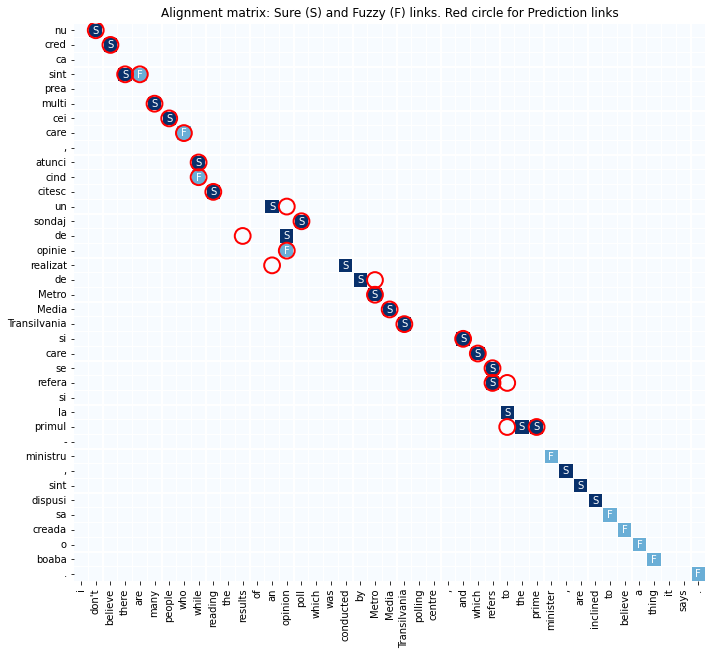

In [274]:
show_alignment(source, target, sure, fuzzy, prediction=pred)

### Analysis tools

In [ ]:
resultRef = analyse_reference(sure, fuzzy, source, target)
resultPred  = analyse_prediction(pred, sure, fuzzy, source, target)

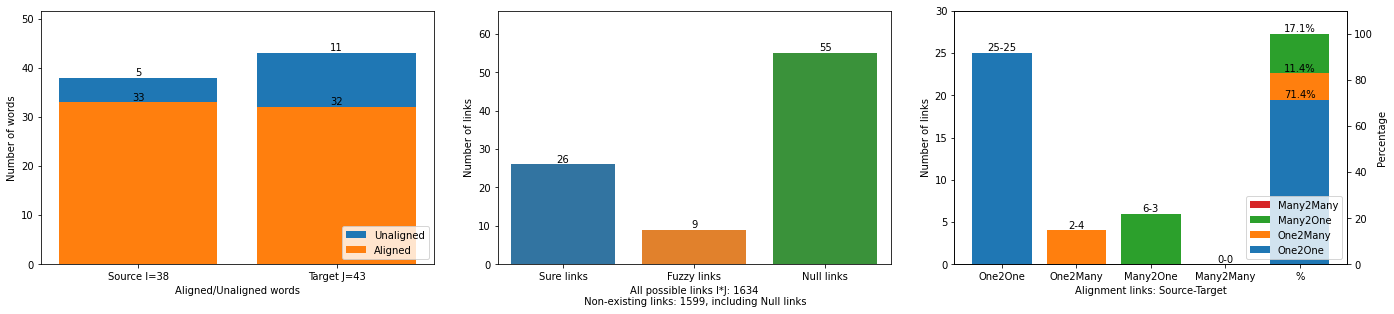

In [164]:
show_graphs_reference(resultRef)

In the first graph, we observe the number of aligned and unaligned words. The second graph shows the number of sure, fuzzy links and Null links (the definition of this type of link is found in [Theses.fr](https://www.theses.fr/2021UPASG014)). The fertility pattern is displayed in the last graph.

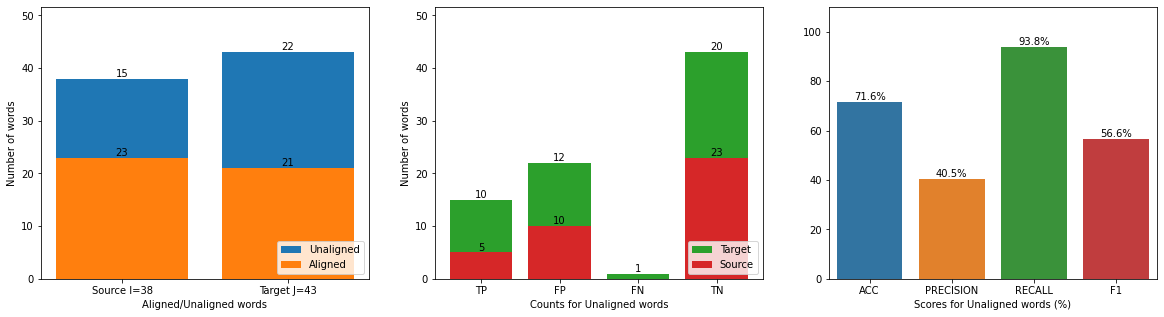

In [168]:
show_graphs_prediction_words(resultPred)

n the first graph, we observe the number of aligned and unaligned words in the prediction set. The next graphs displays the counts for unaligned words (words do not align with any words): True Positive (number of correct unaligned words), False Positive, False Negative, True Negative. The last one demonstrates the performance measures of an model for unaligned words.

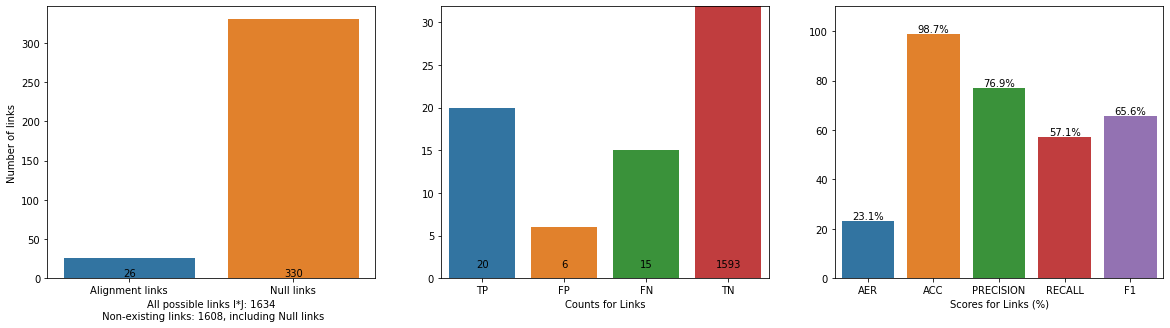

In [169]:
show_graphs_prediction_links(resultPred)

We observe predicted links in the first graph. In the two next graphs, the performance of an model are displayed.

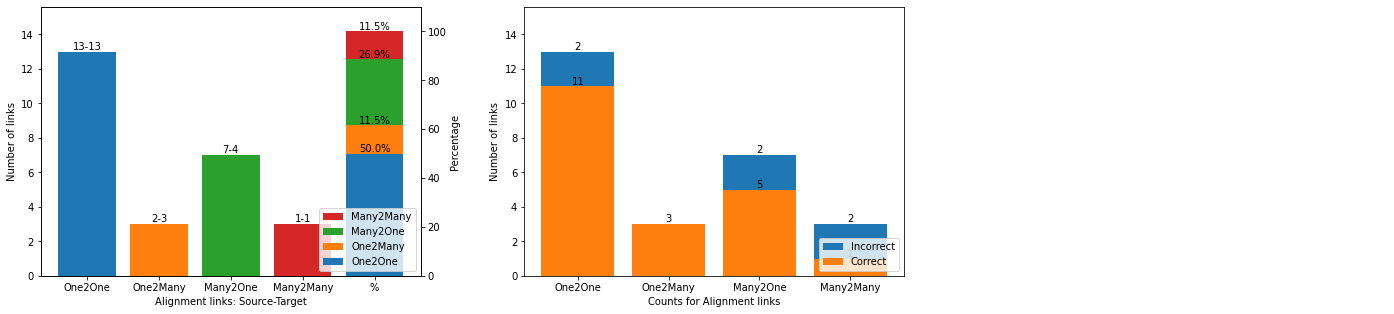

In [170]:
show_graphs_prediction_fertility(resultPred)

The left graph displays the fertility pattern learned by an model and the right graph is for the correctness of this pattern.